# Bagging套袋法代码演示

In [1]:
import numpy as np
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
X,y = datasets.load_wine(return_X_y = True)
X_train,X_test,y_train,y_test = train_test_split(X,y,random_state = 1024)

## 单个KNN算法建模

In [4]:
knn = KNeighborsClassifier(n_neighbors=3,weights='distance')

knn.fit(X_train,y_train)

print(knn.predict(X_test))

knn.score(X_test,y_test)

[2 2 2 2 1 2 0 2 1 2 0 0 1 2 0 2 0 0 1 0 2 2 2 2 2 0 1 0 1 1 1 1 1 0 0 2 1
 1 0 1 1 1 0 0 2]


0.6666666666666666

## 多个KNN算法集成

In [6]:
bag = BaggingClassifier(base_estimator=KNeighborsClassifier(),
                        n_estimators=500,
                        max_samples=0.8,# 随机抽样
                        max_features=0.7)# 随机选择特征
bag.fit(X_train,y_train)

# 查看KNN集成算法表现
bag.score(X_test,y_test)

0.7555555555555555

## 单个决策树

In [7]:
clf = DecisionTreeClassifier()

clf.fit(X_train,y_train)

clf.score(X_test,y_test)

0.8444444444444444

## 多个决策树，进行集成

In [8]:
bag_estimator = BaggingClassifier(base_estimator=DecisionTreeClassifier(),
                                  n_estimators=300,
                                  max_samples=0.9,
                                  max_features=0.8)
bag_estimator.fit(X_train,y_train)

bag_estimator.score(X_test,y_test)

0.9555555555555556

In [9]:
from sklearn.ensemble import RandomForestClassifier

In [12]:
clf = RandomForestClassifier(n_estimators=100,
                             max_samples=0.9,
                             max_features=0.8)

clf.fit(X_train,y_train)
clf.score(X_test,y_test)

0.9555555555555556

# GBDT梯度提升回归树应用（天池工业蒸汽量预测）

In [13]:
from sklearn.ensemble import GradientBoostingRegressor
import numpy as np
import pandas as pd 

# 加载数据
# 干数据，GBDT得分0.1438，凑合，不错
data_train = pd.read_csv('zhengqi_train.txt', sep='\t')
data_test = pd.read_csv('zhengqi_test.txt', sep='\t')
X_train = data_train.iloc[:,:-1] # 数据、属性
y_train = data_train['target'] # 目标值
X_test = data_test # 预测

# GBDT模型训练预测
gbdt = GradientBoostingRegressor()
gbdt.fit(X_train,y_train)

y_pred = gbdt.predict(X_test)
np.savetxt('GBDT_full_feature_result.txt', y_pred)

# GBDT梯度提升回归树原理

## 数据构建和建模

In [15]:
import numpy as np
from sklearn.ensemble import GradientBoostingRegressor
import matplotlib.pyplot as plt
from sklearn import tree
import graphviz

### 实际问题，年龄预测，回归问题
# 简单的数据，算法原理，无论简单数据，还是复杂数据，都一样
# 属性一表示花销，属性二表示上网时间
X = np.array([[600,0.8],[800,1.2],[1500,10],[2500,3]])
y = np.array([14,16,24,26]) # 高一、高三，大四，工作两年

# loss  = ls 最小二乘法
learning_rate = 0.1
gbdt = GradientBoostingRegressor(n_estimators=3,loss = 'ls',# 最小二乘法
                                 learning_rate=0.1)#learning_rate 学习率

gbdt.fit(X,y)#训练
y_ = gbdt.predict(X)#预测
y_

array([18.374, 18.916, 21.084, 21.626])

## 残差计算

In [16]:
# 目标值，真实值，算法，希望，预测，越接近真实，模型越好！！！
print(y)
# 求平均，这个平均值就是算法第一次预测的基准，初始值
print(y.mean())
# 残差：真实值，和预测值之间的差
residual_1 = y - y.mean()
residual_1
# 残差，越小越好
# 如果残差是0，算法完全准确的把数值预测出来！

[14 16 24 26]
20.0


array([-6., -4.,  4.,  6.])

## 可视化第一棵树

In [17]:
gbdt[0,0]

DecisionTreeRegressor(criterion='friedman_mse', max_depth=3,
                      random_state=RandomState(MT19937) at 0x7F93E852EC40)

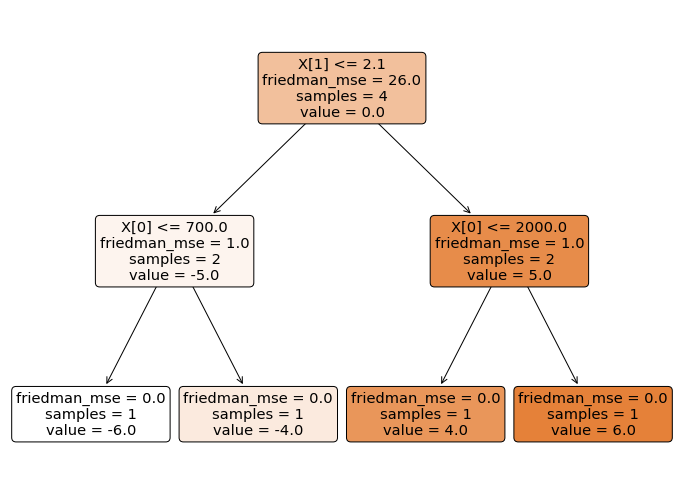

In [19]:
# dot_data = tree.export_graphviz(gbdt[0,0],filled=True,rounded=True)
# graphviz.sources.Source(dot_data)
plt.figure(figsize=(12,9))
_ = tree.plot_tree(gbdt[0,0],filled=True,rounded=True)

In [20]:
# 第一棵树，预测值和mse均方误差，通过代码进行了计算
((y - y.mean())**2).mean()

26.0

In [21]:
((residual_1 - residual_1.mean())**2).mean()

26.0

## 可视化第二棵树

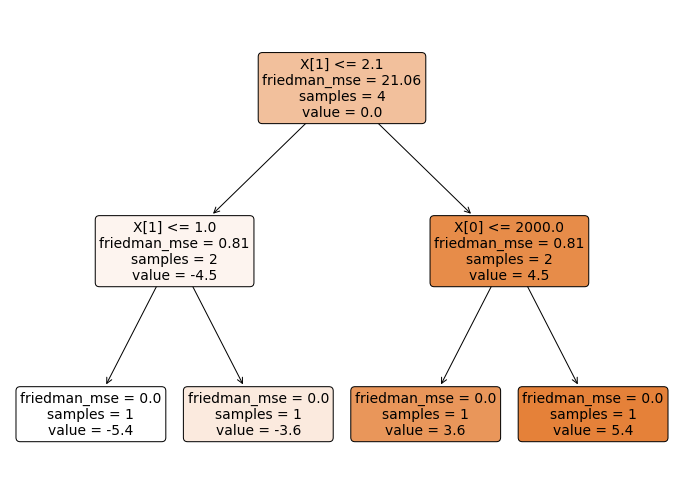

In [22]:
# dot_data = tree.export_graphviz(gbdt[1,0],filled=True,rounded=True)
# graphviz.sources.Source(dot_data)
plt.figure(figsize=(12,9))
_ = tree.plot_tree(gbdt[1,0],filled=True,rounded=True)

In [23]:
# 第一棵树梯度提升
# 残差，越小越好
residual_2 = residual_1 - residual_1 * learning_rate
residual_2

array([-5.4, -3.6,  3.6,  5.4])

In [24]:
np.round(((residual_2 - residual_2.mean())**2).mean(),2)

21.06

## 可视化第三棵树

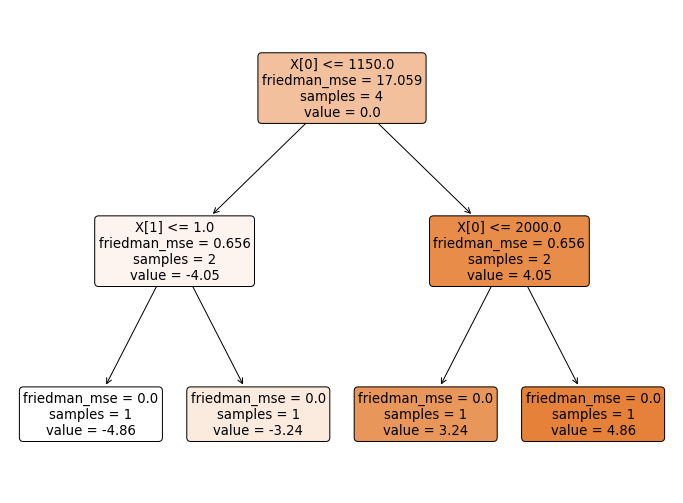

In [25]:
# dot_data = tree.export_graphviz(gbdt[2,0],filled=True,rounded=True)
# graphviz.sources.Source(dot_data)
plt.figure(figsize=(12,9))
_ = tree.plot_tree(gbdt[2,0],filled=True,rounded=True)

In [26]:
residual_3 = residual_2 - residual_2*learning_rate
residual_3

array([-4.86, -3.24,  3.24,  4.86])

In [27]:
np.round(((residual_3 - residual_3.mean())**2).mean(),3)

17.059

## 算法预测值

In [28]:
# 直接使用算法预测结果
gbdt.predict(X)

array([18.374, 18.916, 21.084, 21.626])

In [29]:
# 最后一棵树，进行梯度提升
residual = residual_3 - residual_3 * learning_rate
residual

array([-4.374, -2.916,  2.916,  4.374])

In [30]:
# 真实值和残差的差值
y - residual

array([18.374, 18.916, 21.084, 21.626])

# 梯度提升回归树裂分条件计算

## 第一棵树

In [31]:
print(X[:,0])

[ 600.  800. 1500. 2500.]


In [32]:
print(X[:,1])

[ 0.8  1.2 10.   3. ]


In [33]:
# 计算未分裂均方误差
lower_mse = ((residual_1 - residual_1.mean())**2).mean()
print('未分裂均方误差是：',lower_mse)

# 分裂，后的均分误差变小
best_split = {}
for index in range(2): # X属性两个，花销、上网时长
    for i in range(3): # 因为4个样本，裂分，3种方式（1和2之前，2和3之间，3和4之间）
        t = X[:,index].copy() # 切片，索引，将某个属性数据拿到了
        t.sort() # 排序
        split = t[i:i + 2].mean() # 切片，一次取两个，求平均，列分值
        
        # 筛选条件
        cond = X[:,index] <= split
        mse1 = round(((residual_1[cond] - residual_1[cond].mean())**2).mean(),3) # 满足裂分条件
        mse2 = round(((residual_1[~cond] - residual_1[~cond].mean())**2).mean(),3) # 不满足裂分条件
        
        p1 = cond.sum()/cond.size # 计算比例
        mse = round(mse1 * p1 + mse2 * (1- p1),3)
        print('第%d列' % (index),'裂分条件是：',split,'均方误差是：',mse1,mse2,mse)
        
        # 条件判断
        if mse < lower_mse: # 进行分裂得到的mse变小
            best_split.clear()
            lower_mse = mse
            best_split['第%d列'%(index)] = split
        elif mse == lower_mse:
            best_split['第%d列'%(index)] = split
print('最佳分裂条件是：',best_split)

未分裂均方误差是： 26.0
第0列 裂分条件是： 700.0 均方误差是： 0.0 18.667 14.0
第0列 裂分条件是： 1150.0 均方误差是： 1.0 1.0 1.0
第0列 裂分条件是： 2000.0 均方误差是： 18.667 0.0 14.0
第1列 裂分条件是： 1.0 均方误差是： 0.0 18.667 14.0
第1列 裂分条件是： 2.1 均方误差是： 1.0 1.0 1.0
第1列 裂分条件是： 6.5 均方误差是： 27.556 0.0 20.667
最佳分裂条件是： {'第0列': 1150.0, '第1列': 2.1}


## 第二棵树

In [34]:
# 计算未分裂均方误差
lower_mse = ((residual_2 - residual_2.mean())**2).mean()
print('未分裂均方误差是：',lower_mse)

# 分裂，后的均分误差变小
best_split = {}
for index in range(2): # X属性两个，花销、上网时长
    for i in range(3): # 因为4个样本，裂分，3种方式（1和2之前，2和3之间，3和4之间）
        t = X[:,index].copy() # 切片，索引，将某个属性数据拿到了
        t.sort() # 排序
        split = t[i:i + 2].mean() # 切片，一次取两个，求平均，列分值
        
        # 筛选条件
        cond = X[:,index] <= split
        mse1 = round(((residual_2[cond] - residual_2[cond].mean())**2).mean(),3) # 满足裂分条件
        mse2 = round(((residual_2[~cond] - residual_2[~cond].mean())**2).mean(),3) # 不满足裂分条件
        
        p1 = cond.sum()/cond.size # 计算比例
        mse = round(mse1 * p1 + mse2 * (1- p1),3)
        print('第%d列' % (index),'裂分条件是：',split,'均方误差是：',mse1,mse2,mse)
        
        # 条件判断
        if mse < lower_mse: # 进行分裂得到的mse变小
            best_split.clear()
            lower_mse = mse
            best_split['第%d列'%(index)] = split
        elif mse == lower_mse:
            best_split['第%d列'%(index)] = split
print('最佳分裂条件是：',best_split)

未分裂均方误差是： 21.060000000000002
第0列 裂分条件是： 700.0 均方误差是： 0.0 15.12 11.34
第0列 裂分条件是： 1150.0 均方误差是： 0.81 0.81 0.81
第0列 裂分条件是： 2000.0 均方误差是： 15.12 0.0 11.34
第1列 裂分条件是： 1.0 均方误差是： 0.0 15.12 11.34
第1列 裂分条件是： 2.1 均方误差是： 0.81 0.81 0.81
第1列 裂分条件是： 6.5 均方误差是： 22.32 0.0 16.74
最佳分裂条件是： {'第0列': 1150.0, '第1列': 2.1}


## 第三棵树

In [35]:
# 计算未分裂均方误差
lower_mse = ((residual_3 - residual_3.mean())**2).mean()
print('未分裂均方误差是：',lower_mse)

# 分裂，后的均分误差变小
best_split = {}
for index in range(2): # X属性两个，花销、上网时长
    for i in range(3): # 因为4个样本，裂分，3种方式（1和2之前，2和3之间，3和4之间）
        t = X[:,index].copy() # 切片，索引，将某个属性数据拿到了
        t.sort() # 排序
        split = t[i:i + 2].mean() # 切片，一次取两个，求平均，列分值
        
        # 筛选条件
        cond = X[:,index] <= split
        mse1 = round(((residual_3[cond] - residual_3[cond].mean())**2).mean(),3) # 满足裂分条件
        mse2 = round(((residual_3[~cond] - residual_3[~cond].mean())**2).mean(),3) # 不满足裂分条件
        
        p1 = cond.sum()/cond.size # 计算比例
        mse = round(mse1 * p1 + mse2 * (1- p1),3)
        print('第%d列' % (index),'裂分条件是：',split,'均方误差是：',mse1,mse2,mse)
        
        # 条件判断
        if mse < lower_mse: # 进行分裂得到的mse变小
            best_split.clear()
            lower_mse = mse
            best_split['第%d列'%(index)] = split
        elif mse == lower_mse:
            best_split['第%d列'%(index)] = split
print('最佳分裂条件是：',best_split)

未分裂均方误差是： 17.058600000000002
第0列 裂分条件是： 700.0 均方误差是： 0.0 12.247 9.185
第0列 裂分条件是： 1150.0 均方误差是： 0.656 0.656 0.656
第0列 裂分条件是： 2000.0 均方误差是： 12.247 0.0 9.185
第1列 裂分条件是： 1.0 均方误差是： 0.0 12.247 9.185
第1列 裂分条件是： 2.1 均方误差是： 0.656 0.656 0.656
第1列 裂分条件是： 6.5 均方误差是： 18.079 0.0 13.559
最佳分裂条件是： {'第0列': 1150.0, '第1列': 2.1}
